In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder,OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import Lasso ,  LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [3]:
# 1. import data
data = pd.read_csv("/content/insurance.csv")
# 2. categorical encoding
data_linear_reg = pd.get_dummies(data,columns=['sex', 'smoker','region'], drop_first=True)
# 3. scalling
col_names = ['age', 'bmi']
features = data_linear_reg[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
data_linear_reg[col_names] = features
# 4.train test split
x_train, x_test, y_train, y_test = train_test_split(data_linear_reg.drop(columns=["charges"]), data_linear_reg["charges"], test_size=0.2, random_state=42)
#5. linear regression model
linear_reg = sm.OLS(y_train, x_train).fit()

In [4]:
data = pd.read_csv("insurance.csv")
data_lasso = pd.get_dummies(data,columns=['sex', 'smoker','region'], drop_first=True)
col_names = ['age', 'bmi']
features = data_lasso[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
data_lasso[col_names] = features
search = GridSearchCV(Lasso(),
                      {'alpha':np.arange(0.1,200,1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=0
                      )
x_train, x_test, y_train, y_test = train_test_split(data_lasso.drop(columns=["charges"]), data_lasso["charges"], test_size=0.2, random_state=42)
search.fit(x_train,y_train)
search.best_params_

{'alpha': 74.1}

In [5]:
lasso_reg = Lasso(alpha = 74.1)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=74.1)

In [6]:
def pred_result(pred,y_test):
  score_MSE = round(mean_squared_error(pred, y_test))
  score_MAE = round(mean_absolute_error(pred, y_test))
  score_r2score = round(r2_score(pred, y_test),2)
  print(f"MSE: {score_MSE} | MAE: {score_MAE} | R2score: {score_r2score}")

In [7]:
lasso_pred = lasso_reg.predict(x_test)
pred_result(lasso_pred, y_test)

MSE: 34153021 | MAE: 4237 | R2score: 0.69


In [8]:
lasso_pred

array([ 8654.60659294,  7155.17056722, 36407.25113994,  9469.41145307,
       26662.0592855 , 11039.19439141,   496.79168959, 16705.43493835,
        1111.05219114, 11157.25147508, 28131.03709635,  9360.30541837,
        5637.7926623 , 37913.10499949, 39840.732145  , 36703.52136019,
       15201.89704329, 35590.0637349 ,  9433.89893961, 31115.94750948,
        4288.8304419 , 10429.94367874,  2921.62855687,  6724.07896993,
       11228.84292687, 12532.32548853, 14739.57480704,  6155.10716832,
        9609.4787414 ,  2657.74122124,  9394.68986513, 13017.66292554,
        4910.44101014,  3604.12557823,  4941.27984705, 12519.31627948,
        2542.23267407,  9193.07131446, 32894.29732411, 32365.90779029,
        4264.33523343,  4430.97335116, 14335.68371577, 11507.40477478,
        8977.4426332 , 12465.06543035,  5282.97069545,  3650.4843957 ,
       35138.26593026,  9308.93180263, 15945.56898067,  2796.53885659,
       12153.00831321,  1387.20230578, 13590.04325281, 12109.00800827,
      

In [9]:
err = linear_reg.params - linear_reg.conf_int()[0]
coef_df = pd.DataFrame({'coef': round(linear_reg.params),
                        'Standard Error': round(linear_reg.bse),
                        't_Stats': round(linear_reg.tvalues,1),
                        'error': round(err)
                       }).reset_index().rename(columns={"index":"columns"})
coef_df

,columns,coef,Standard Error,t_Stats,error
0,age,3598.0,217.0,16.6,425.0
1,bmi,1616.0,225.0,7.2,442.0
2,children,1425.0,166.0,8.6,325.0
3,sex_male,2724.0,395.0,6.9,775.0
4,smoker_yes,25153.0,526.0,47.8,1032.0
5,region_northwest,5114.0,510.0,10.0,1000.0
6,region_southeast,5191.0,497.0,10.4,976.0
7,region_southwest,4925.0,496.0,9.9,974.0


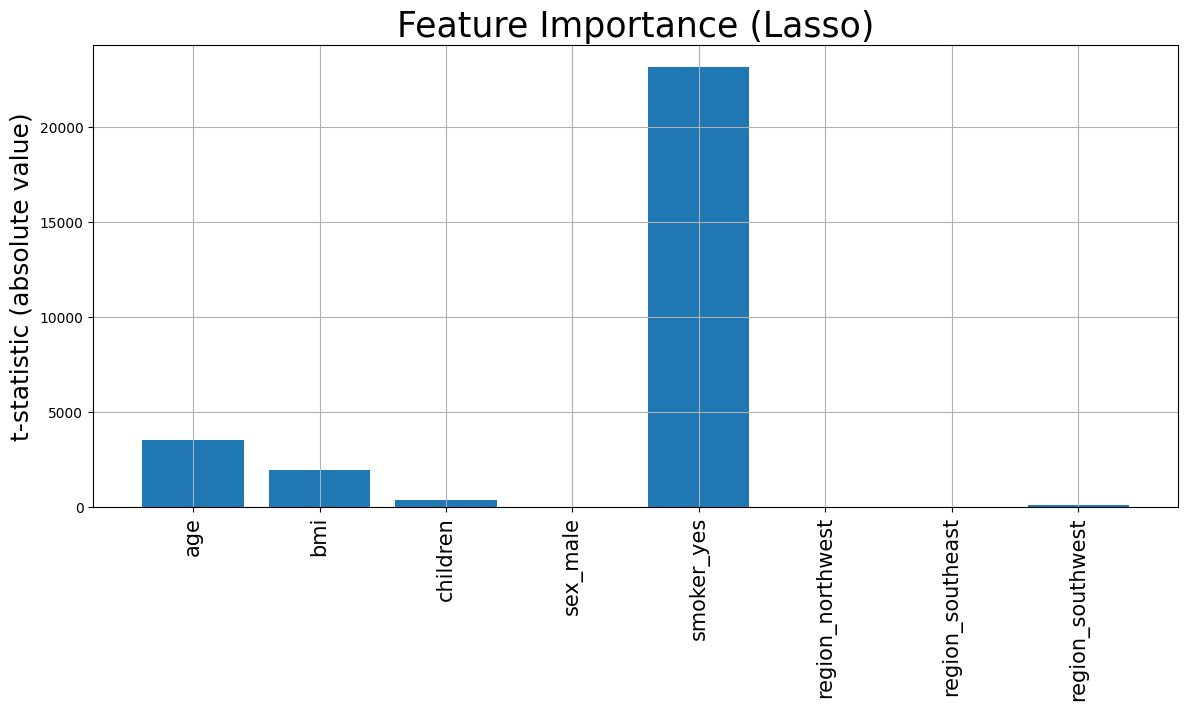

In [10]:
coefficients = lasso_reg.coef_
importance = np.abs(coefficients)
plt.figure(figsize=(14,6))
plt.bar(x_train.columns, importance)
plt.title("Feature Importance (Lasso)",fontsize=25)
plt.ylabel("t-statistic (absolute value)",fontsize=18)
plt.grid()
plt.xticks(rotation=90,fontsize=15)
plt.show()

In [11]:
forth_sample = x_test.iloc[4]
lasso_reg.coef_
print("predicted: ",int(lasso_reg.predict([forth_sample.values])))
print("actual: ",int(y_test.iloc[4]))

predicted:  26662
actual:  33750


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


## DECISSION TREE

In [12]:
encoder = LabelEncoder()
data[['age','sex','smoker','region']] = data[['age','sex','smoker','region']].apply(encoder.fit_transform)
data_tree = data.copy()
tree_reg = DecisionTreeRegressor(random_state=42,max_leaf_nodes=5)
x_train, x_test, y_train, y_test = train_test_split(data_tree.drop(columns=["charges"]), data_tree["charges"], test_size=0.2, random_state=42)
tree_reg.fit(x_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=5, random_state=42)

In [13]:
tree_pred = tree_reg.predict(x_test)
pred_result(tree_pred, y_test)

MSE: 26368109 | MAE: 3325 | R2score: 0.8


Feature: 0, Score: 0.08997
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.18054
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.72949
Feature: 5, Score: 0.00000


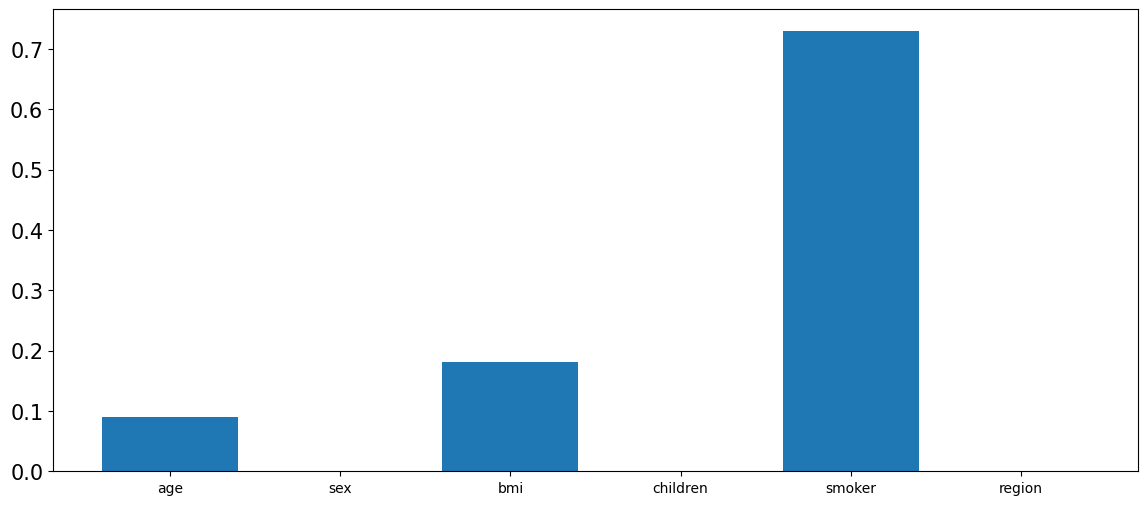

In [14]:
importance = tree_reg.feature_importances_
plt.figure(figsize=(14,6))
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar(x_train.columns, importance)
plt.yticks(fontsize=15)
plt.show()

In [15]:
forth_sample = x_test.iloc[4]
print("predicted: ",int(tree_reg.predict([forth_sample.values])))
print("actual: ",int(y_test.iloc[4]))

predicted:  36691
actual:  33750


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


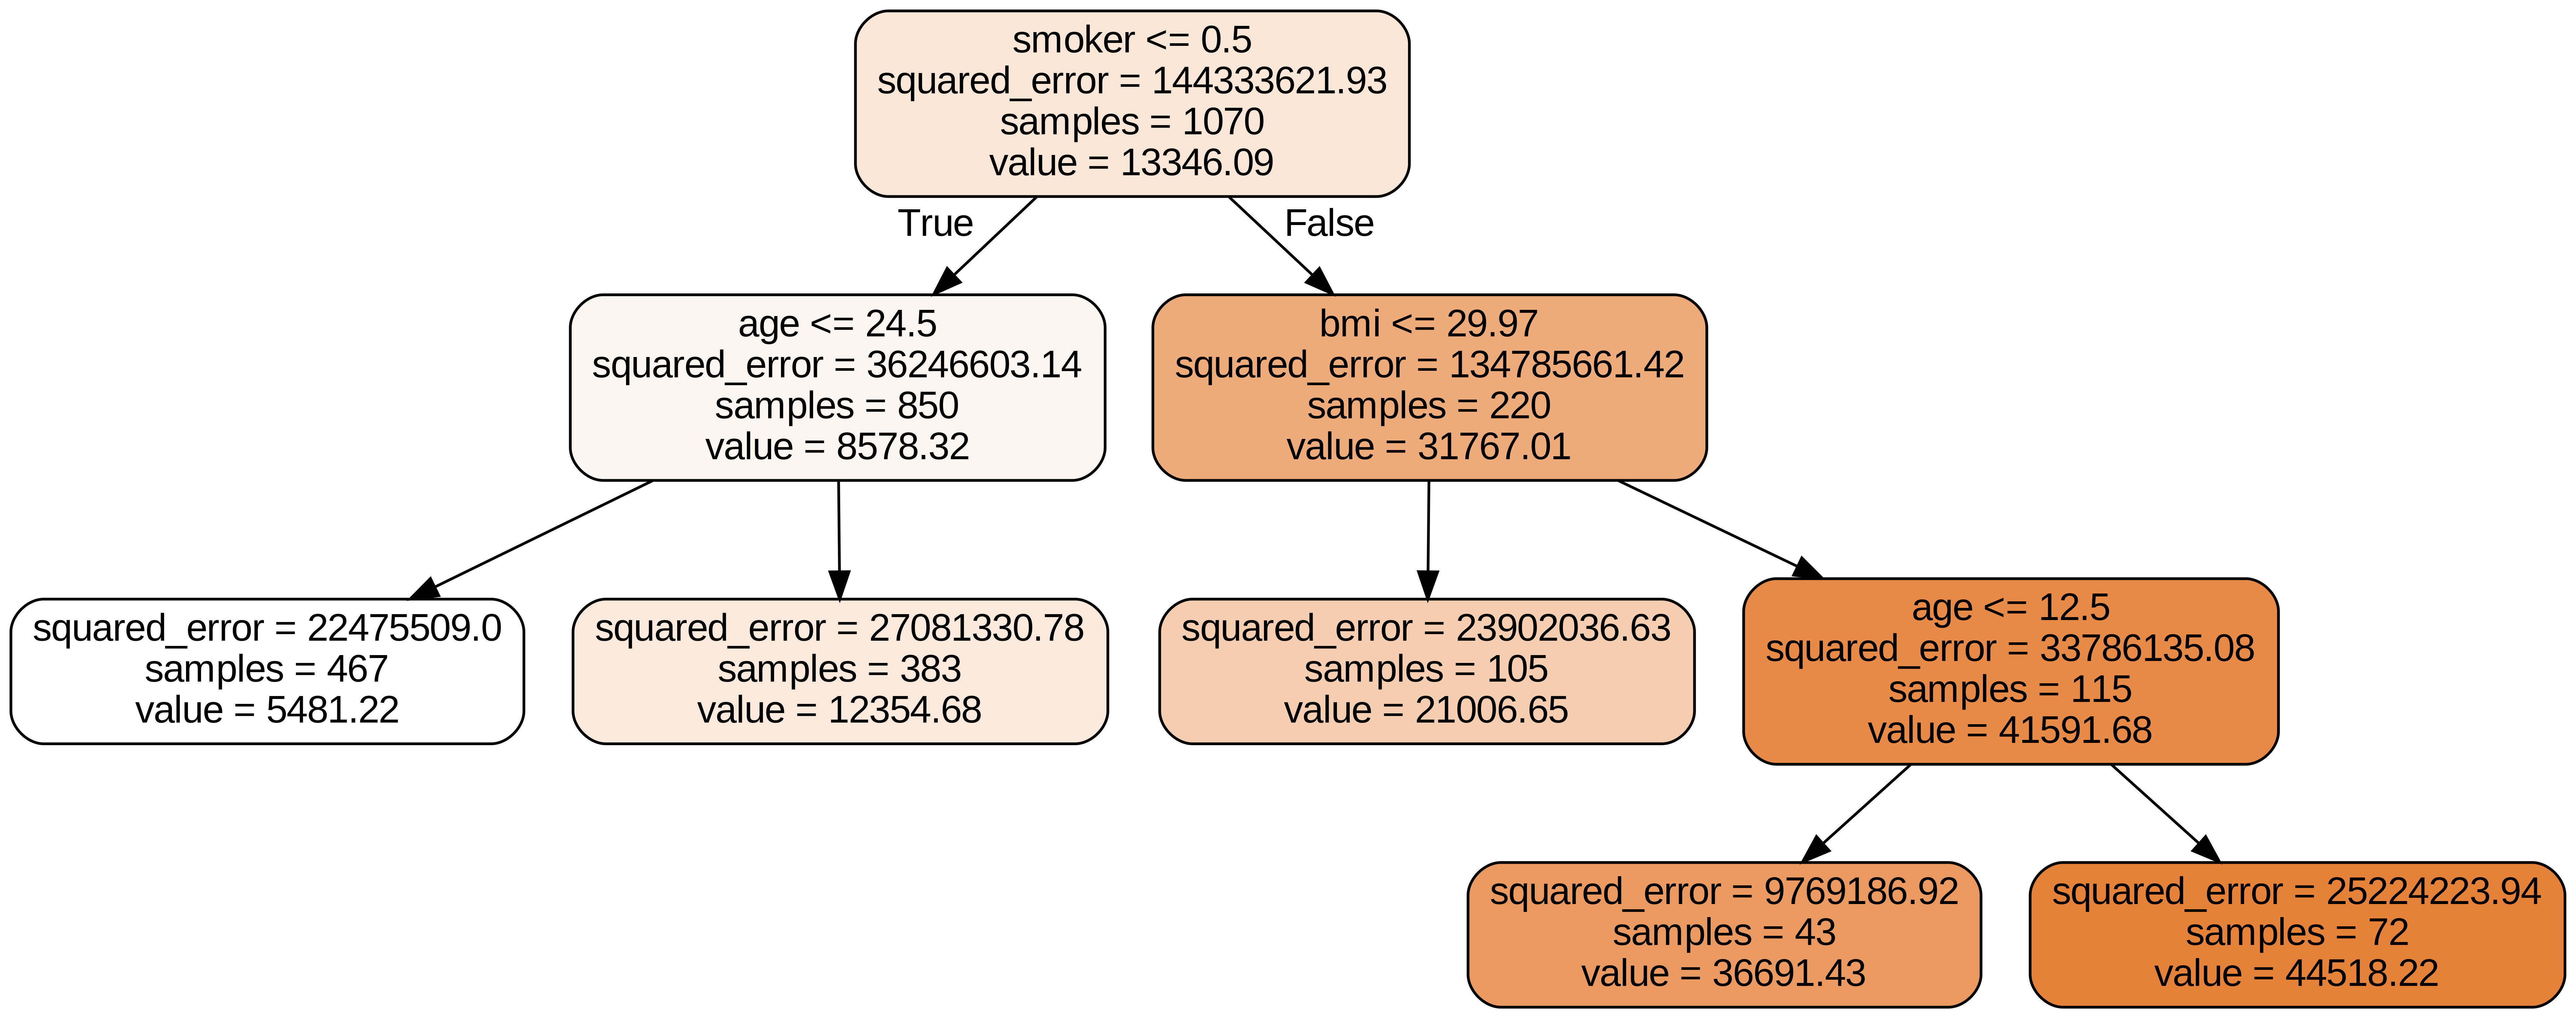

In [16]:
from sklearn.tree import export_graphviz
from IPython.display import Image
from subprocess import call
export_graphviz(tree_reg, out_file='tree.dot',
                feature_names = x_train.columns,
                rounded = True, proportion = False,
                precision = 2, filled = True)
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
Image(filename = 'tree.png')